In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage.segmentation import active_contour

In [84]:
img_path = r'.\slipper.jpg'
img = cv2.imread(img_path,0)

(330, 495)

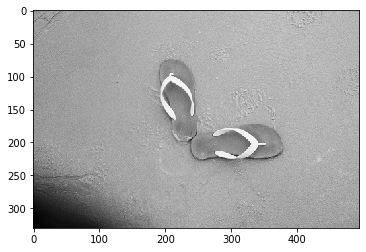

In [85]:
plt.imshow(img,cmap='gray')
img.shape

In [86]:
img.shape

(330, 495)

In [94]:
s = np.linspace(0, 2*np.pi, 330)
r = 330/2 + 120*np.sin(s)
c = 495/2 + 150*np.cos(s)
init = np.array([r, c]).T

In [95]:
s.shape

(330,)

In [96]:
init.shape

(330, 2)

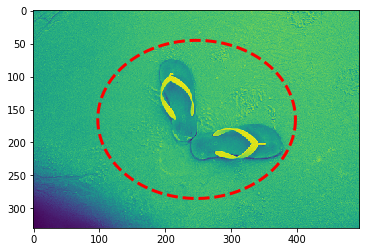

In [97]:
plt.plot(init[:, 1], init[:, 0], '--r', lw=3)
plt.imshow(img)

In [104]:
#snake =  active_contour(img,init)
snake = active_contour(img,
                       init, alpha=0.06, beta=10, gamma=0.0001,
                       coordinates='rc',max_iterations=5000)

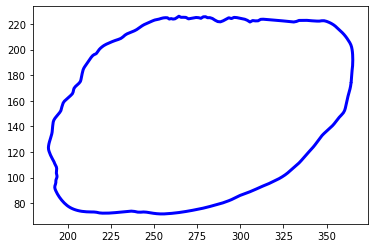

In [105]:
plt.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

[0, 495, 330, 0]

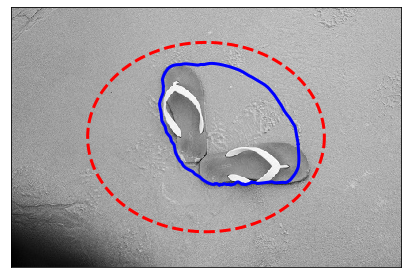

In [106]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

In [66]:
from skimage.segmentation import chan_vese

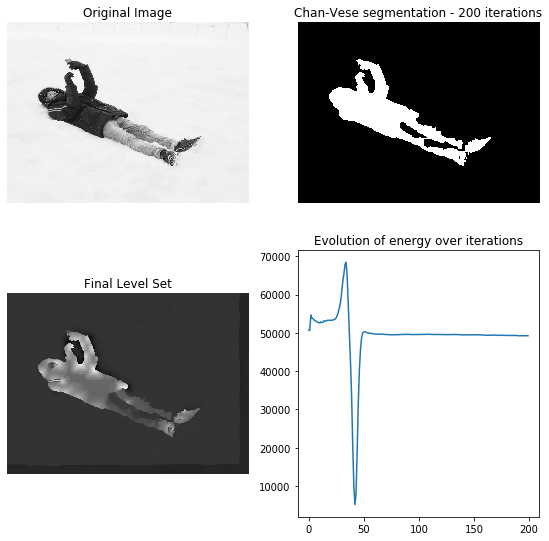

In [68]:
cv = chan_vese(img, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(img, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()